In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("weatherAUS.csv")

In [9]:
df.shape

(142193, 24)

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [12]:
df["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [13]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

C:\Users\bharg\AppData\Local\Temp\ipykernel_11488\3889771497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
C:\Users\bharg\AppData\Local\Temp\ipykernel_11488\3889771497.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'

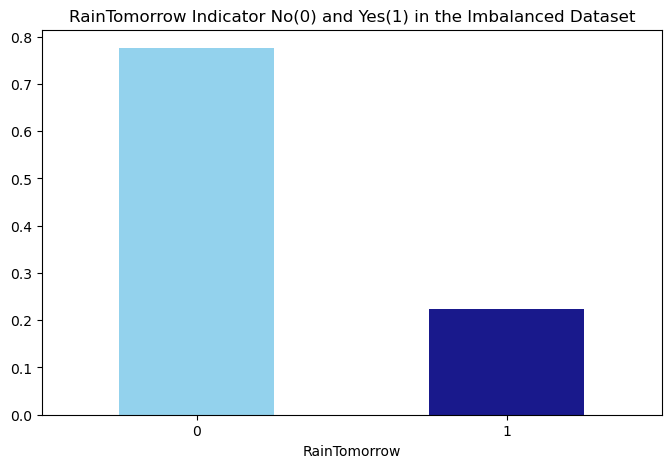

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

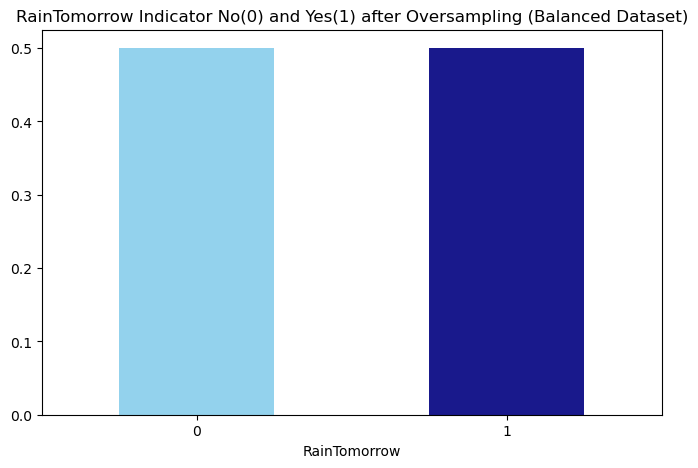

In [15]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [16]:
oversampled.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           0.490409
MaxTemp           0.213478
Rainfall          1.415932
Evaporation      43.244407
Sunshine         47.513960
WindGustDir       7.021194
WindGustSpeed     6.959099
WindDir9am        6.675369
WindDir3pm        2.918888
WindSpeed9am      0.999855
WindSpeed3pm      1.972969
Humidity9am       1.437235
Humidity3pm       2.733511
Pressure9am       9.848073
Pressure3pm       9.856231
Cloud9am         36.866366
Cloud3pm         38.803981
Temp9am           0.749211
Temp3pm           2.065883
RainToday         1.415932
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [17]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [18]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [19]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [20]:
oversampled.isnull().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir           0
WindGustSpeed     15354
WindDir9am            0
WindDir3pm            0
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [21]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

c:\Users\bharg\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [22]:
MiceImputed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [23]:
# Detecting outliers with IQR
Q1 = oversampled.quantile(0.25)
Q3 = oversampled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.0
Location           25.0
MinTemp             9.3
MaxTemp            10.2
Rainfall            2.2
Evaporation         4.6
Sunshine            6.7
WindGustDir         9.0
WindGustSpeed      19.0
WindDir9am          8.0
WindDir3pm          8.0
WindSpeed9am       13.0
WindSpeed3pm       11.0
Humidity9am        26.0
Humidity3pm        31.0
Pressure9am         9.7
Pressure3pm         9.8
Cloud9am            5.0
Cloud3pm            4.0
Temp9am             9.3
Temp3pm             9.8
RainToday           1.0
RISK_MM             5.2
RainTomorrow        1.0
dtype: float64


In [24]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(157495, 24)

<Axes: >

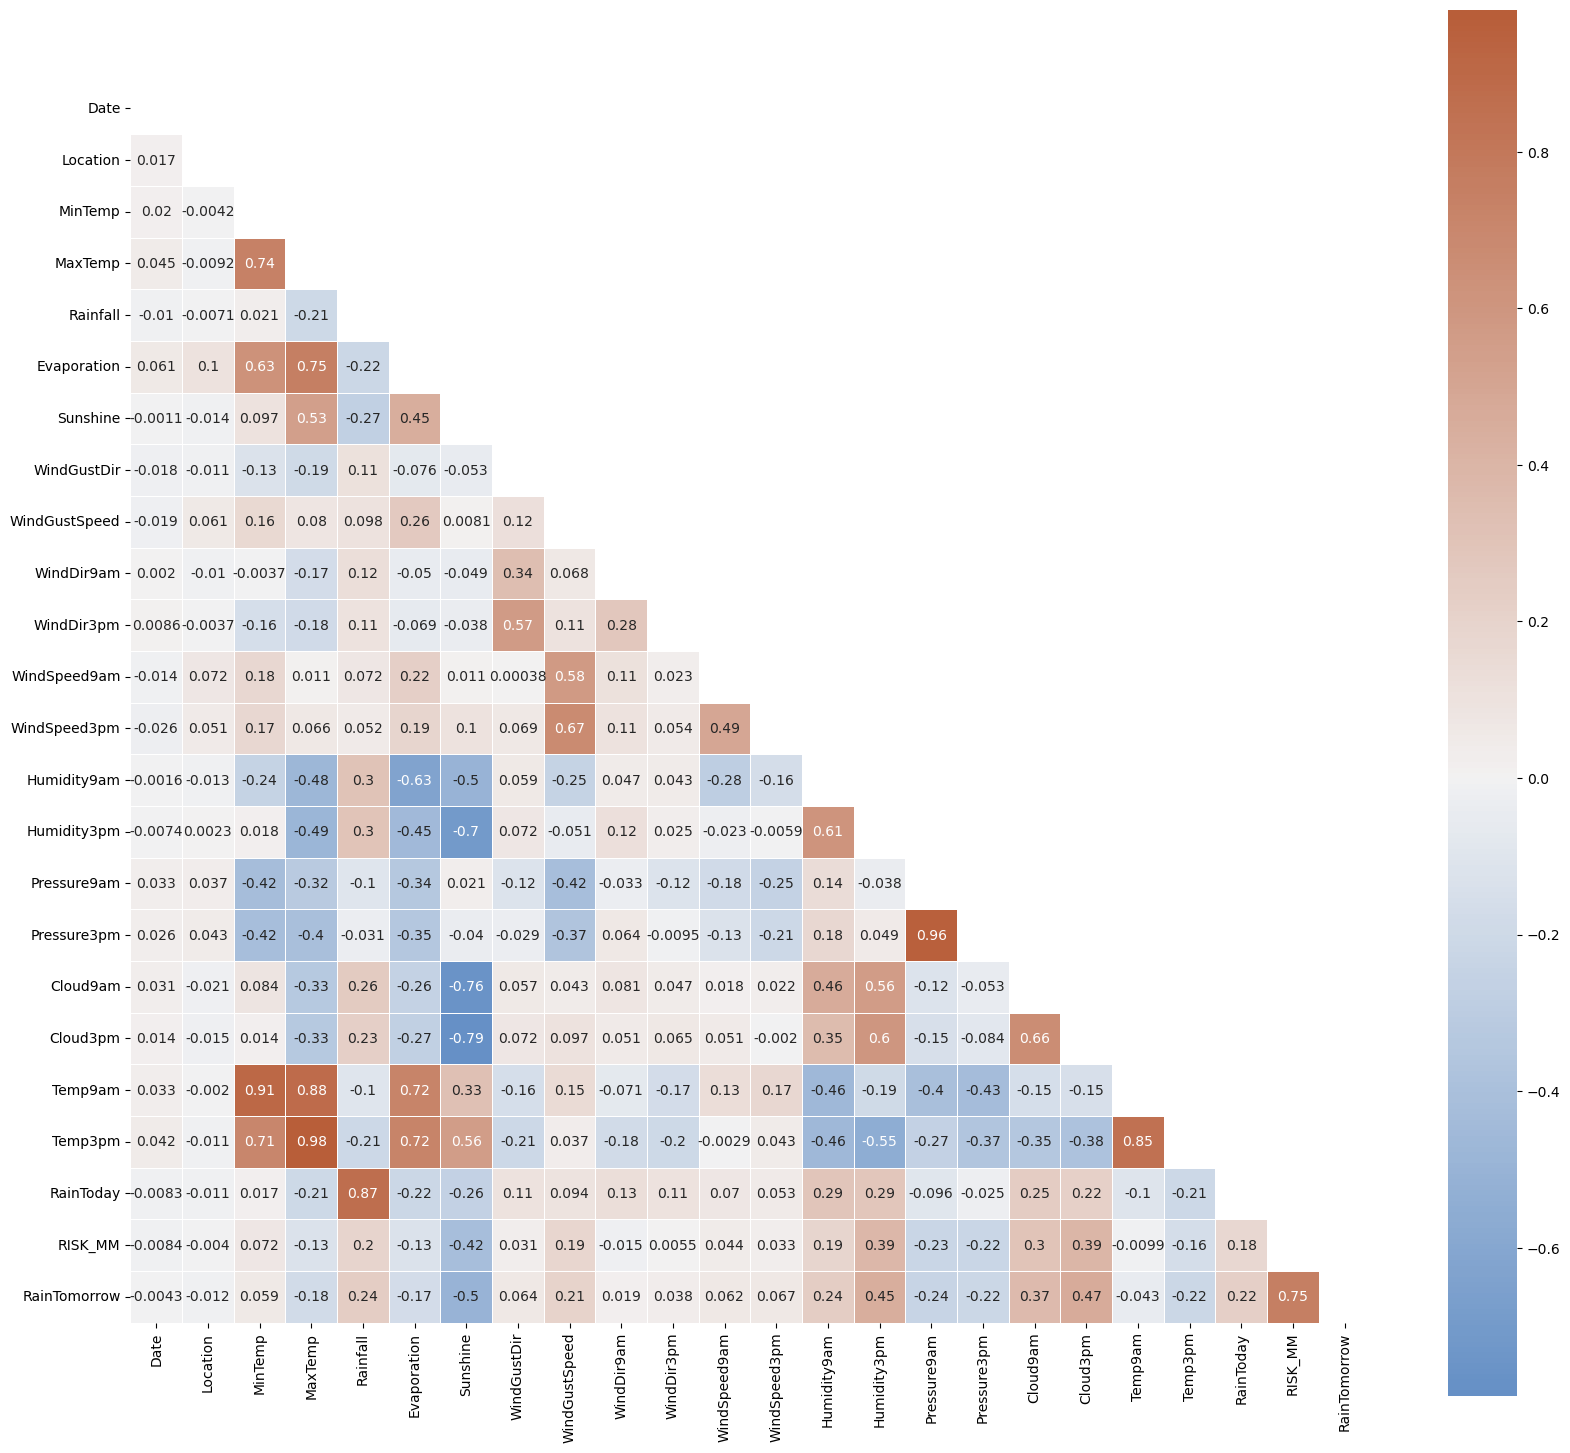

In [21]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

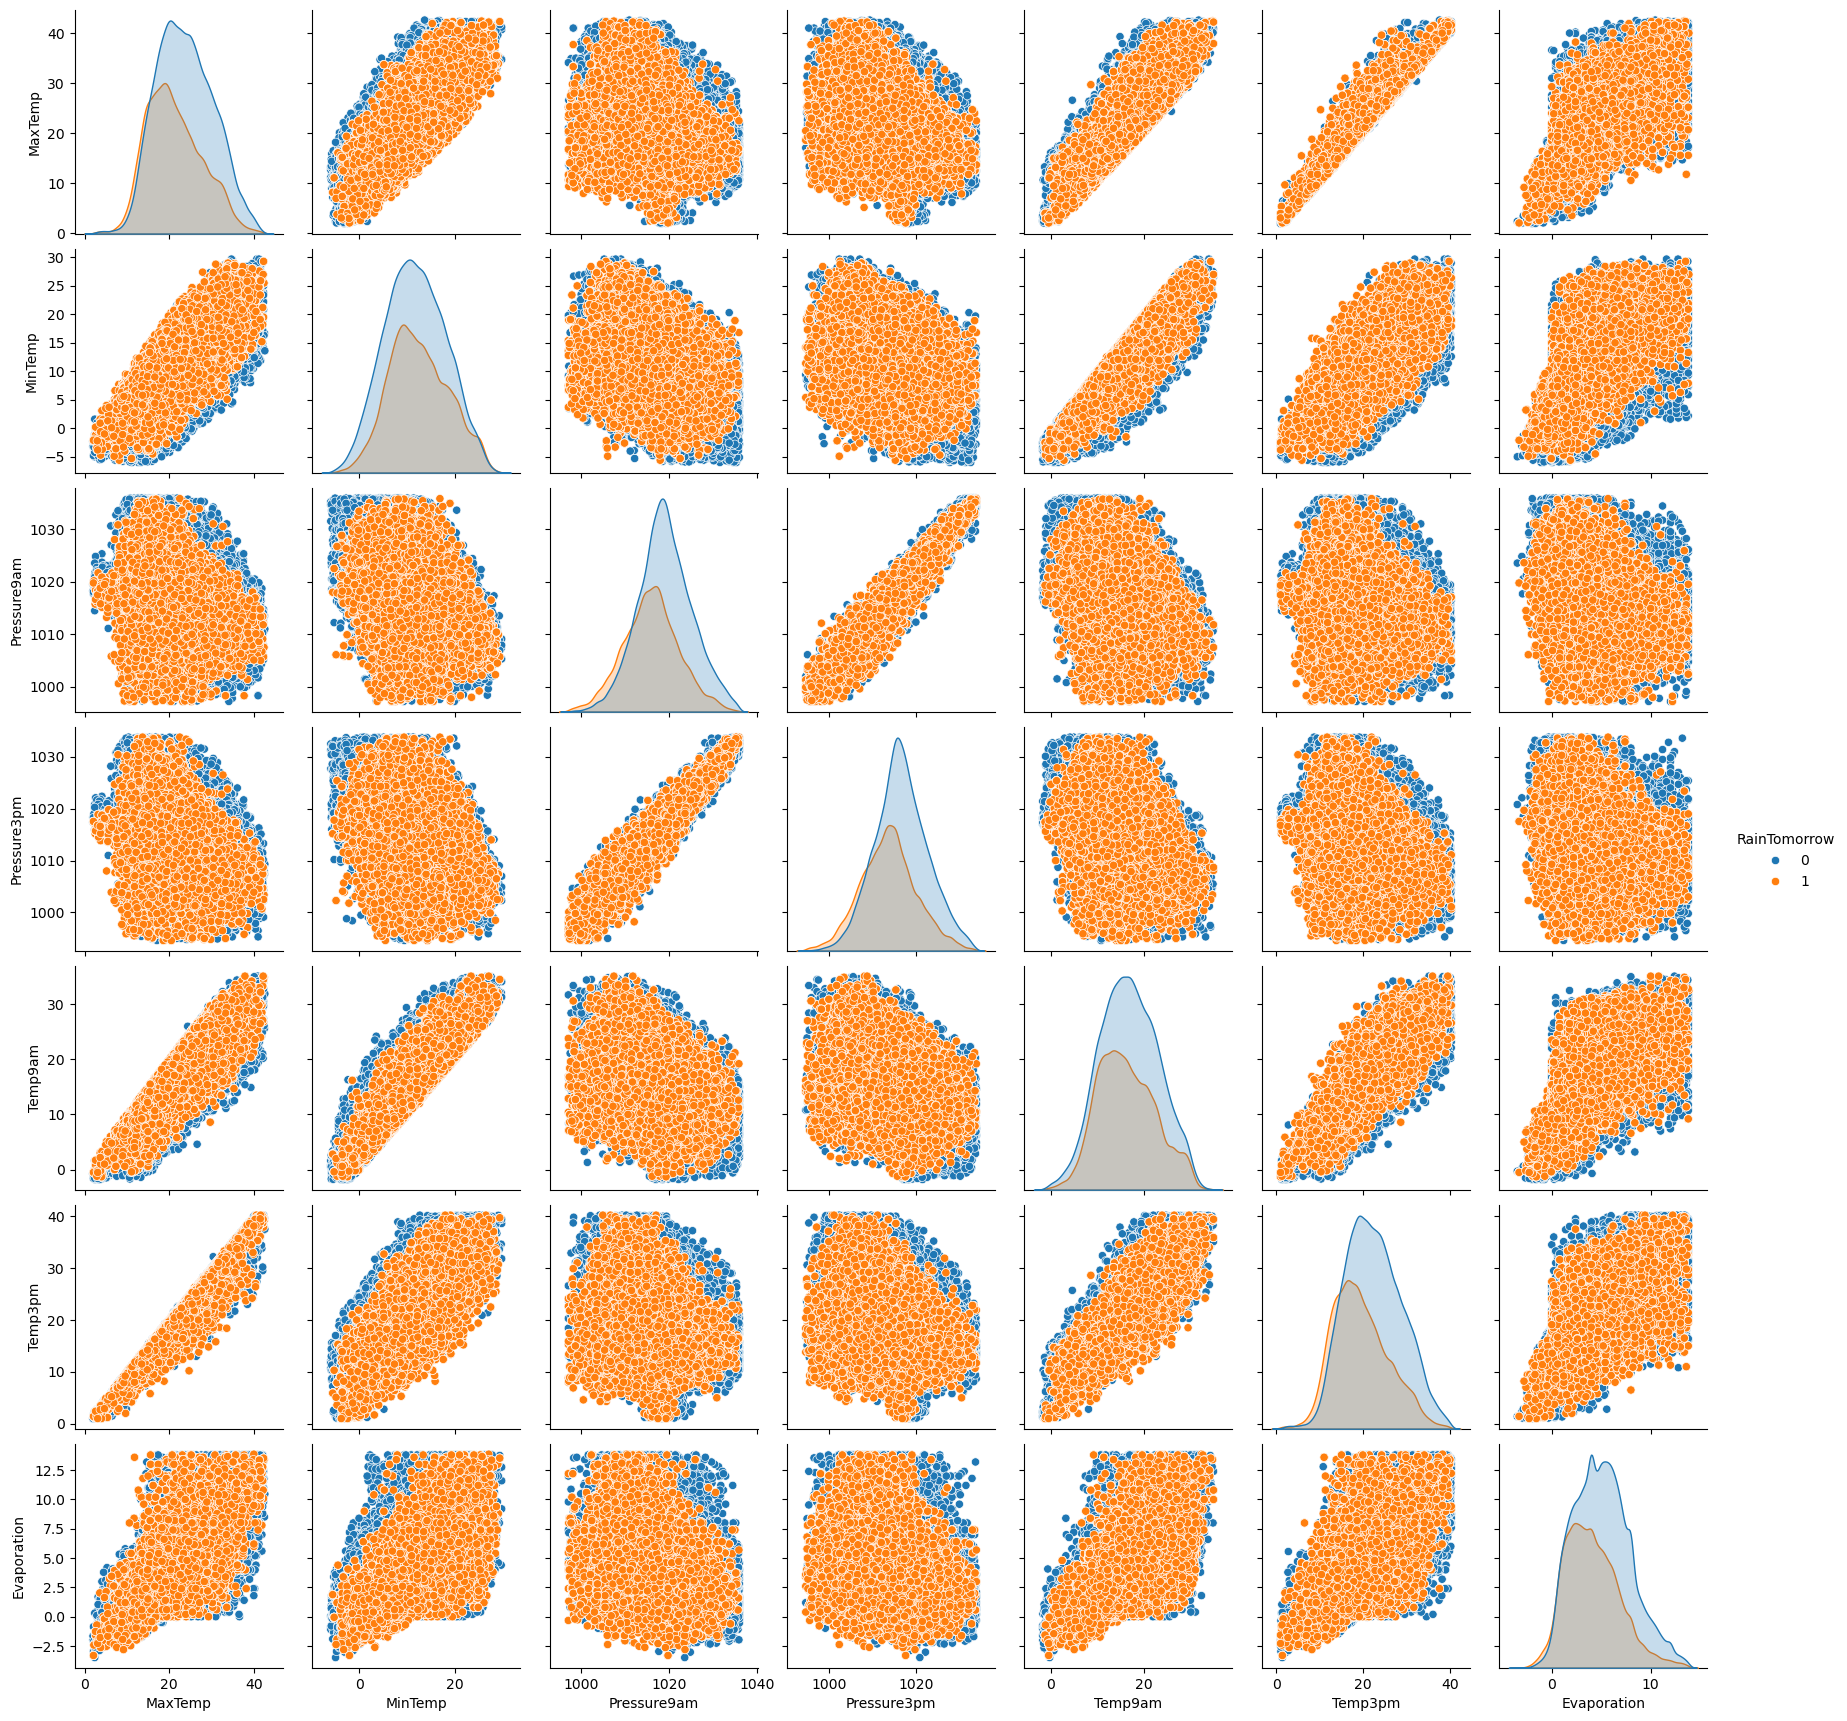

In [22]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

In [25]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [26]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [27]:
MiceImputed.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.002291   0.00244306 0.00286936 0.00394031 0.01004676 0.00286016
 0.06399276 0.00174052 0.00827994 0.00195882 0.00187807 0.00160302
 0.00222322 0.00739534 0.03413168 0.00961697 0.01387019 0.01962644
 0.04707237 0.00309046 0.00553757 0.00395681 0.74957516]


In [29]:
features = MiceImputed[['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
features

,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,7.364116,44.0,71.0,22.0,1007.7,8.000000,4.868720,21.8,0.0
1,11.470601,44.0,44.0,25.0,1010.6,1.734671,2.639541,24.3,0.0
2,12.281872,46.0,38.0,30.0,1007.6,1.820254,2.000000,23.2,0.0
3,11.743982,24.0,45.0,16.0,1017.6,1.236006,2.133027,26.5,0.0
4,5.756442,41.0,82.0,33.0,1010.8,7.000000,8.000000,29.7,0.0
...,...,...,...,...,...,...,...,...,...
125885,6.198887,28.0,93.0,61.0,1020.6,5.226307,5.391114,20.8,0.0
30707,0.700000,43.0,86.0,62.0,1034.2,7.392057,7.384768,16.3,0.0
130416,0.725087,13.0,97.0,98.0,1020.1,6.438835,7.620772,9.5,0.0
84962,3.400000,48.0,63.0,60.0,1008.6,5.000000,6.000000,30.3,0.0


In [41]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [43]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    
    return model, accuracy, roc_auc, time_taken

In [39]:
X_train.shape

(118121, 21)

Accuracy = 0.7788388276527658
ROC Area under Curve = 0.7582239511850244
Time taken = 0.26924633979797363
              precision    recall  f1-score   support

           0    0.80355   0.84774   0.82505     24221
           1    0.73316   0.66871   0.69945     15153

    accuracy                        0.77884     39374
   macro avg    0.76835   0.75822   0.76225     39374
weighted avg    0.77646   0.77884   0.77671     39374



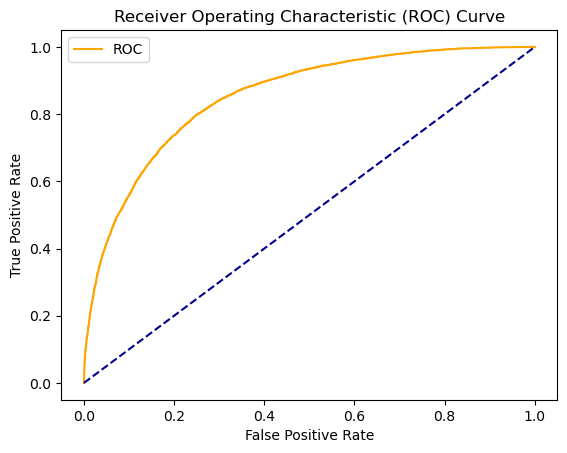

Accuracy = 0.8692284248488851
ROC Area under Curve = 0.8670119765115338
Time taken = 0.3831484317779541
              precision    recall  f1-score   support

           0    0.90763   0.87664   0.89186     24221
           1    0.81302   0.85739   0.83461     15153

    accuracy                        0.86923     39374
   macro avg    0.86032   0.86701   0.86324     39374
weighted avg    0.87122   0.86923   0.86983     39374



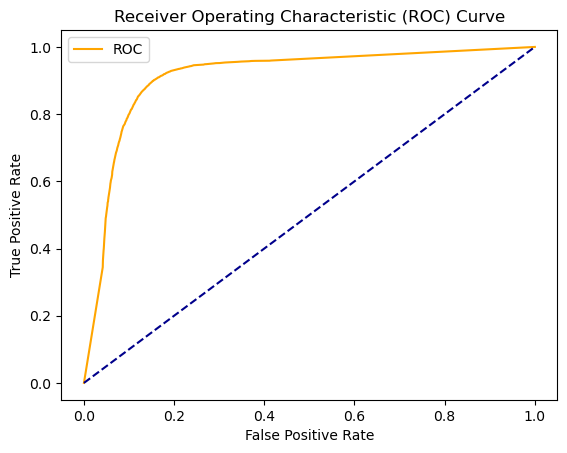

Accuracy = 0.9237313963529232
ROC Area under Curve = 0.923221173018327
Time taken = 21.951336145401
              precision    recall  f1-score   support

           0    0.94931   0.92544   0.93722     24221
           1    0.88542   0.92101   0.90286     15153

    accuracy                        0.92373     39374
   macro avg    0.91736   0.92322   0.92004     39374
weighted avg    0.92472   0.92373   0.92400     39374



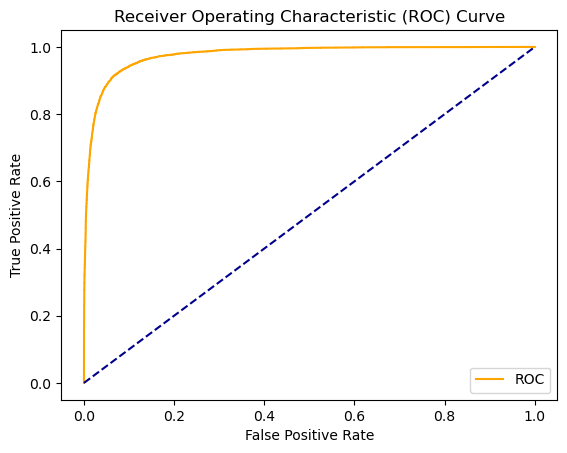

Accuracy = 0.9369888759079595
ROC Area under Curve = 0.9421502711891164
Time taken = 8.318941831588745
              precision    recall  f1-score   support

           0    0.97646   0.91974   0.94725     24221
           1    0.88261   0.96456   0.92177     15153

    accuracy                        0.93699     39374
   macro avg    0.92954   0.94215   0.93451     39374
weighted avg    0.94034   0.93699   0.93744     39374



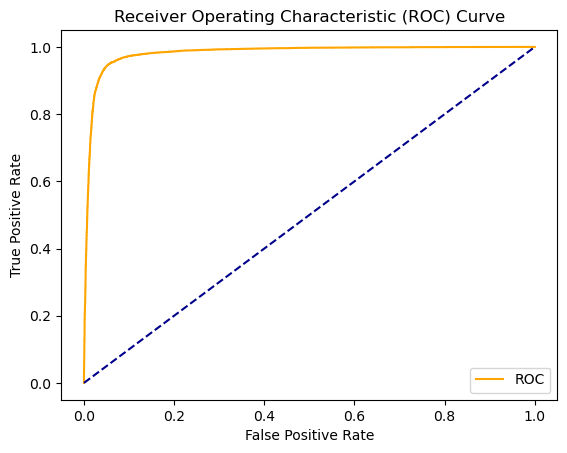

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


In [27]:
# ANN
import tensorflow
from tensorflow import keras
from keras.layers import Dense,BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(32,activation="relu",input_shape=(9,)))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

es = EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,953 (179.50 KB)

 Trainable params: 44,993 (175.75 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7942 - loss: 0.4432 - val_accuracy: 0.8217 - val_loss: 0.3852
Epoch 2/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8180 - loss: 0.3975 - val_accuracy: 0.8356 - val_loss: 0.3634
Epoch 3/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8285 - loss: 0.3813 - val_accuracy: 0.8374 - val_loss: 0.3553
Epoch 4/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8333 - loss: 0.3731 - val_accuracy: 0.8400 - val_loss: 0.3523
Epoch 5/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8352 - loss: 0.3692 - val_accuracy: 0.8425 - val_loss: 0.3429
Epoch 6/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8373 - loss: 0.3640 - val_accuracy: 0.8444 - val_loss: 0.3456
Epoch 7/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8376 - loss: 0.3621 - val_accuracy: 0.8439 - val_loss: 0.3439
Epoch 8/100
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8398 -

KeyboardInterrupt: 

In [81]:
accuracy_nn = history.history["val_accuracy"]
accuracy_nn = pd.DataFrame(accuracy_nn)
accuracy_nn

,0
0,0.821329
1,0.836796
2,0.839615
3,0.845025
4,0.844161
5,0.846117
6,0.845837
7,0.848656
8,0.843831
9,0.848377


In [82]:
print("accuracy_lor: ",accuracy_lr)
print("accuracy_dt: ",accuracy_dt)
print("accuracy_rf: ",accuracy_rf)
print("accuracy_xgb: ",accuracy_xgb)
print("accuracy_nn: ", accuracy_nn.max())

accuracy_lor:  0.7788134301823538
accuracy_dt:  0.8614567989028292
accuracy_rf:  0.9237313963529232
accuracy_xgb:  0.9369888759079595
accuracy_nn:  0    0.848656
dtype: float64


C:\Users\bharg\AppData\Local\Temp\ipykernel_8424\2286775112.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')


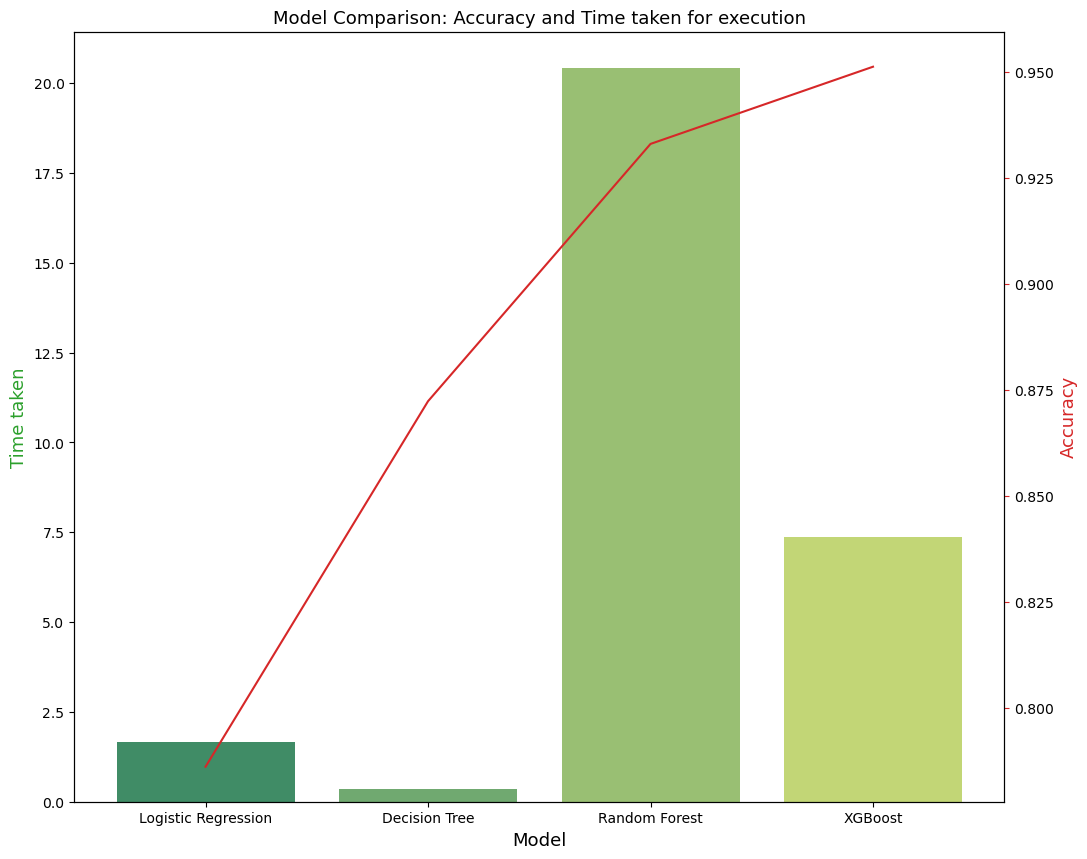

In [54]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

C:\Users\bharg\AppData\Local\Temp\ipykernel_8424\379529590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')


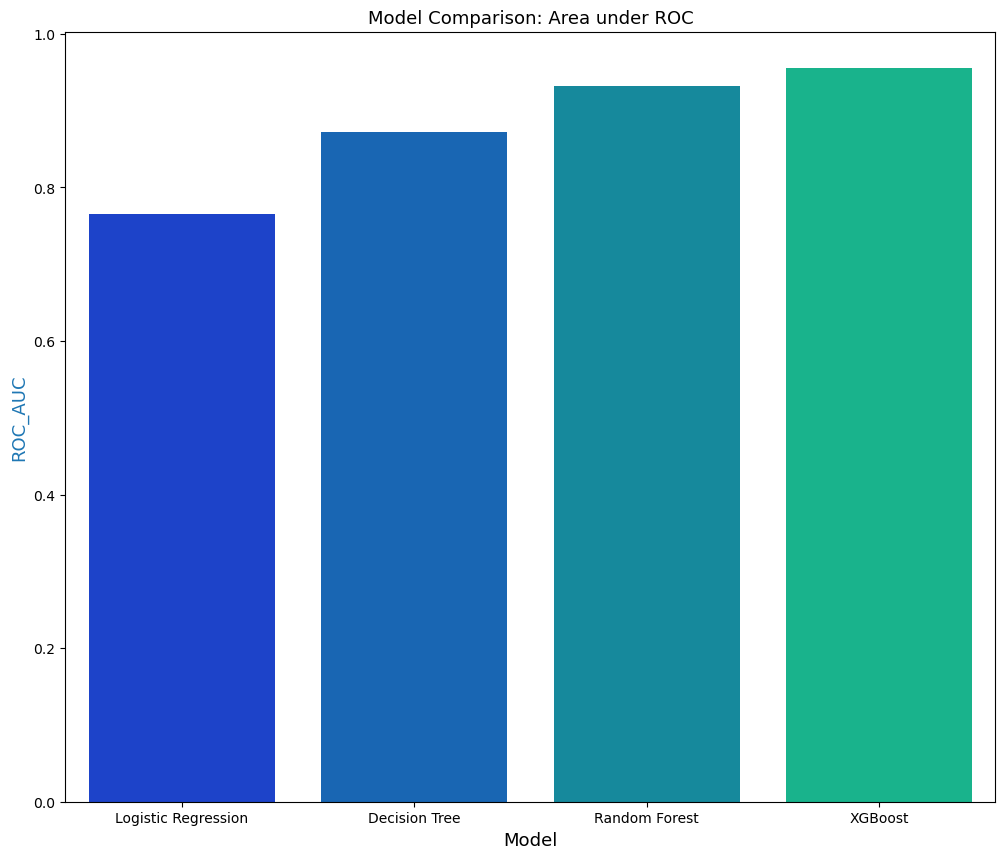

In [45]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
plt.show()

In [31]:
import pickle
pickle.dump(model_xgb,open("model_xgb.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))

In [68]:
def predict():

    features = [
    'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday']


    print("Enter the following values:")
    Sunshine = float(input("Sunshine (hours): "))
    WindGustSpeed = float(input("Wind Gust Speed (km/h): "))
    Humidity9am = float(input("Humidity at 9am (%): "))
    Humidity3pm = float(input("Humidity at 3pm (%): "))
    Pressure9am = float(input("Pressure at 9am (hPa): "))
    Cloud9am = float(input("Cloud at 9am (oktas): "))
    Cloud3pm = float(input("Cloud at 3pm (oktas): "))
    Temp3pm = float(input("Temperature at 3pm (°C): "))
    RainToday = input("Did it rain today? (yes/no): ").strip().lower()


    RainToday = 1 if RainToday in ["yes","y","1"] else 0


    df = pd.DataFrame([[Sunshine, WindGustSpeed, Humidity9am, Humidity3pm,
                        Pressure9am, Cloud9am, Cloud3pm, Temp3pm, RainToday]],columns=features)

    scaled_input = scaler.transform(df)

    y_pred = model_xgb.predict(scaled_input)[0]

    if y_pred == 1:
        print("Yes, it will rainy tomorrow")    
    else:
         print("\n☀️ No rain expected tomorrow.")

In [66]:
predict()

Enter the following values:

☀️ No rain expected tomorrow.


In [69]:
features

,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,7.364116,44.0,71.0,22.0,1007.7,8.000000,4.868720,21.8,0.0
1,11.470601,44.0,44.0,25.0,1010.6,1.734671,2.639541,24.3,0.0
2,12.281872,46.0,38.0,30.0,1007.6,1.820254,2.000000,23.2,0.0
3,11.743982,24.0,45.0,16.0,1017.6,1.236006,2.133027,26.5,0.0
4,5.756442,41.0,82.0,33.0,1010.8,7.000000,8.000000,29.7,0.0
...,...,...,...,...,...,...,...,...,...
125885,6.198887,28.0,93.0,61.0,1020.6,5.226307,5.391114,20.8,0.0
30707,0.700000,43.0,86.0,62.0,1034.2,7.392057,7.384768,16.3,0.0
130416,0.725087,13.0,97.0,98.0,1020.1,6.438835,7.620772,9.5,0.0
84962,3.400000,48.0,63.0,60.0,1008.6,5.000000,6.000000,30.3,0.0
